In [1]:
import pandas as pd
import numpy as np
import torch as T
from torch import nn
import torch.nn.functional as F

import chemprop
import rdkit

import pickle as pkl
import gzip

from tqdm.notebook import tqdm
import argparse

import random

In [2]:
import covid
from covid.datasets import *
from covid.modules import *
from covid.data import *
from covid.model import *
from covid.schedulers import LinearWarmupScheduler
from covid.reporting import get_performance_plots

from covid.modules.chemistry import MPNEncoder

In [3]:
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import display

In [4]:
import covid.training

In [5]:
config = covid.training.CovidTrainingConfiguration()

In [6]:
dl, _ = covid.training._create_dataloaders(config)

In [7]:
data = next(iter(dl))

In [8]:
_, chem_batch, chem_f_batch, prot_batch, _ = data

In [9]:
np.exp(-6)

0.0024787521766663585

In [10]:
config.chem_undirected = True
config.chem_atom_messages = True

In [11]:
model = covid.training._create_model(config)
res = model(chem_batch, chem_f_batch, prot_batch)
res

RuntimeError: The size of tensor a (945) must match the size of tensor b (4) at non-singleton dimension 1

In [13]:
res

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 2.0121e-21, 4.7708e-03, 2.9000e-21],
        [5.7479e-01, 5.1361e-01, 4.7839e-01, 2.9510e-01, 1.1528e-01],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.0000e+00, 0.0000e+00, 1.0000e+00, 7.5077e-31, 1.8772e-04],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [9.3171e-01, 1.6819e-02, 2.9866e-01, 3.1749e-01, 8.5037e-03],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.0000e+00, 4.4133e-25, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.0000e+00, 0.0000e+00, 8.1183e-09, 9.9497e-01, 5.6646e-05],
        [2.0471e-02, 3.0788e-39, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [0.0000e+00,

In [16]:
_, f_bonds, a2b, _, _, a_scope, _ = chem_batch.get_components()

In [20]:
a_scope

[(1, 29),
 (30, 22),
 (52, 25),
 (77, 9),
 (86, 27),
 (113, 32),
 (145, 23),
 (168, 30),
 (198, 3),
 (201, 20),
 (221, 30),
 (251, 42),
 (293, 97),
 (390, 28),
 (418, 37),
 (455, 26),
 (481, 23),
 (504, 15),
 (519, 29),
 (548, 1),
 (549, 34),
 (583, 9),
 (592, 10),
 (602, 75),
 (677, 19),
 (696, 28),
 (724, 36),
 (760, 37),
 (797, 12),
 (809, 33),
 (842, 53),
 (895, 22)]

In [15]:
model.chem_head_model(chem_batch)[0].shape

torch.Size([1981, 128])

In [17]:
from hyperopt import Trials

In [18]:
from hyperopt.mongoexp import MongoTrials
import hyperopt

In [19]:
mtrials = MongoTrials('mongo://localhost:1234/covid/jobs') #, exp_key='covid-8')

In [20]:
len(mtrials.trials)

7

In [21]:
hyperopt.STATUS_FAIL

'fail'

In [23]:
mtrials.delete_all()

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [46]:
x = 3
5 > x > 1

True

In [164]:
v_loss

array([0.4719193 , 0.30040295, 0.29290585, 0.27723786])

In [216]:
v_x, v_loss, _, _ = zip(*mtrials.trials[10]['result'].get('validation_stats', [(0,1.0)]))
v_x, v_loss = np.array(v_x[1:]), np.array(v_loss[1:])

# kernel = (
#     1.0 * RBF(length_scale=1.0, length_scale_bounds=(0.0001,10))
#     + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-4, 10))
# )
# gp = GaussianProcessRegressor(kernel=kernel, alpha=0).fit(v_x[:-1].reshape(-1,1), v_loss[1:]-v_loss[:-1])

# X_ = np.linspace(0,10,50)
# y_mean, y_cov = gp.predict(X_.reshape(-1,1), return_cov=True)

# y_mean = np.cumsum(y_mean)
# y_mean -= y_mean[v_x.shape[0]-1] - v_loss[-1]
# plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
# plt.fill_between(X_, y_mean - np.sqrt(np.cumsum(np.diag(y_cov)))*1.65, y_mean + np.sqrt(np.cumsum(np.diag(y_cov)))*1.65, alpha=0.5, color='k')
# plt.scatter(v_x, v_loss)

In [217]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N).  If None, then the
        init

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func_exp(x, a, b, c):
        return a * np.exp(b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (10, -1, 0.15), maxfev=10000)
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(np.linspace(0,10,50), func_exp(np.linspace(0,10,50), *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

In [229]:
v_loss

array([0.31562347, 0.27531525, 0.25896614, 0.23404766, 0.22988034,
       0.21191199, 0.21041474, 0.20575748, 0.19749399, 0.20020197,
       0.18883561, 0.18614933, 0.18709274, 0.18744925, 0.18726777,
       0.18520451, 0.18235041, 0.18086849, 0.18087484, 0.17980106,
       0.17765961, 0.17996113, 0.17674937, 0.17441856, 0.1736659 ])

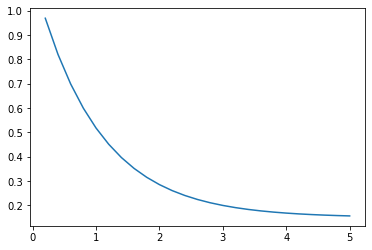

In [236]:
plt.plot(v_x, func_exp(v_x, 1,-1,0.15))

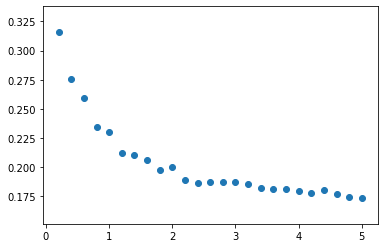

In [230]:
plt.scatter(v_x, v_loss)

[ 0.16755071 -1.23885798  0.17893682]


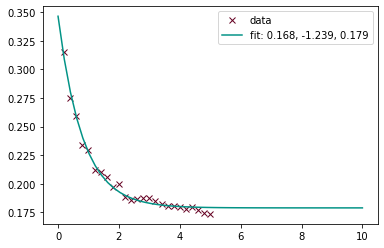

array([0.3096945 , 0.28098097, 0.25858618, 0.2410957 , 0.22747876,
       0.21681927, 0.20850053, 0.20201243, 0.19694518, 0.19300015,
       0.18991378, 0.18750332, 0.1856233 , 0.18415499, 0.18301118,
       0.18211701, 0.18141866, 0.180874  , 0.18044861, 0.18011723,
       0.17985817, 0.17965597, 0.17949805, 0.17937488, 0.1792788 ])

In [237]:
exponential_regression(v_x, v_loss)

In [33]:
help(GaussianProcessRegressor)

Help on class GaussianProcessRegressor in module sklearn.gaussian_process._gpr:

class GaussianProcessRegressor(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
 |  GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None)
 |  
 |  Gaussian process regression (GPR).
 |  
 |  The implementation is based on Algorithm 2.1 of Gaussian Processes
 |  for Machine Learning (GPML) by Rasmussen and Williams.
 |  
 |  In addition to standard scikit-learn estimator API,
 |  GaussianProcessRegressor:
 |  
 |     * allows prediction without prior fitting (based on the GP prior)
 |     * provides an additional method sample_y(X), which evaluates samples
 |       drawn from the GPR (prior or posterior) at given inputs
 |     * exposes a method log_marginal_likelihood(theta), which can be used
 |       externally for other ways of selecting hyperparameters, e.g., v

In [12]:
mtrials.refresh()

In [497]:
mtrials.best_trial['state']

2

In [501]:
hyperopt.JOB_STATE_DONE

2

In [15]:
trials

[]

In [265]:
from collections import Counter

In [267]:
news = [x for x in all_trials.trials if x['state'] == 1]

In [289]:
mtrials.trials[0]['exp_key']


'covid-8'

In [290]:
for x in list(mtrials.trials):
    jobs.find_one_and_delete({'_id': x['_id']})

In [271]:
len(news)

4

In [266]:
Counter(x['state'] for x in all_trials.trials)

Counter({2: 842, 1: 4})

In [13]:
# mtrials.refresh()
# trials = list(mtrials.trials)
# new_trials = []
# mtrials.delete_all()
# for tr in trials:
#     if tr['state'] == hyperopt.STATUS_NEW:
#         continue
    
#     if 'idxs' not in tr['misc']:        
#         continue
        
#     tid = tr['tid']
#     tr['misc']['idxs'] = {k:[tid] for k in tr['misc']['idxs'].keys()}
#     del tr['_id']
#     new_trials.append(tr)
    
# mtrials.insert_trial_docs(new_trials);

In [27]:
f"{4.2:0.0f}"

'4'

In [18]:
for tr in list(mtrials.trials):
    print(tr['tid'], tr['misc']['tid'], tr['misc']['idxs']['chem_hidden_size'])

68452 68452 [68452]
68453 68453 [68453]
68454 68454 [68454]
68455 68455 [68455]
68456 68456 [68456]
68457 68457 [68457]
68458 68458 [68458]
68459 68459 [68459]
68460 68460 [68460]
68461 68461 [68461]
68462 68462 [68462]
68463 68463 [68463]
68464 68464 [68464]
68465 68465 [68465]
68466 68466 [68466]
68467 68467 [68467]
68468 68468 [68468]
68469 68469 [68469]
68470 68470 [68470]
68471 68471 [68471]
68472 68472 [68472]
68473 68473 [68473]
68474 68474 [68474]
68475 68475 [68475]
68476 68476 [68476]
68477 68477 [68477]
68478 68478 [68478]
68479 68479 [68479]
68480 68480 [68480]
68481 68481 [68481]
68482 68482 [68482]
68483 68483 [68483]
68484 68484 [68484]
68485 68485 [68485]
68486 68486 [68486]
68487 68487 [68487]
68488 68488 [68488]


In [17]:
len(all_trials.trials)

NameError: name 'all_trials' is not defined

In [482]:
trials = list(all_trials.trials)

In [490]:
trials.sort(key=lambda x: x['exp_key'], reverse=True)

In [486]:
[x['exp_key'] for x in trials]

['covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'covid-1',
 'co

In [432]:
mtrials.refresh()

In [476]:
mtrials.losses()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 0.21328111628602275,
 0.22479035340367565,
 0.3556961630207984,
 0.22169327307610345,
 0.22389276772592984,
 0.23422493468952832,
 0.2890324062397457,
 0.2520814773839728,
 0.2715198570780236,
 0.2690689443427018,
 0.2258686390389643,
 0.44775285827415306,
 0.2434224739944544,
 0.31642576905365183,
 0.3342891712872157,
 0.28491476489814715,
 0.2749412064689787,
 0.2956341970039592,
 0.27734930605432073,
 0.35449660826809015,
 0.16114772885089448,
 0.18324904197370948,
 0.155036593445272,
 0.19740942185282445,
 0.1610595414137637,
 0.1676622261036571,
 0.1823361170224568,
 0.3520490129614179,
 0.2066641516756525,
 0.16664173639201835,
 0.18660646538284198,
 0.18723331533290288,
 0.16952371641920694,
 0.18484370085302007,
 0.165470789611178,
 0.38596525781677293,
 0.17112317745648262,
 0.18634207285815674,
 0.16525157686275244,
 0.17309890359522506,
 0.17971583028113114,
 0.216281237

In [386]:
mtrials.delete_all()

In [27]:
import json

In [31]:
v_stats = t['result']['validation_stats']

In [33]:
v_x, v_loss, v_acc, v_conf = zip(*v_stats)

In [72]:
from datetime import timedelta
from collections import Iterable, Mapping

In [89]:
def make_json_friendly(result):
    if isinstance(result, list):
        return make_json_list_friendly(result)
    
    if len(result) == 0:
        return result
    
    output = {}
    
    for k,v in result.items():
        if isinstance(v, np.ndarray):
            v = list(v)
        elif isinstance(v, timedelta):
            v = v.total_seconds()
        
        if isinstance(v, Mapping):
            v = make_json_friendly(v)
        elif isinstance(v, Iterable):
            v = make_json_list_friendly(v)
            
        
        output[k] = v
    return output

def make_json_list_friendly(lst):
    if len(lst) == 0 or isinstance(lst, str):
        return lst
    
    output = []
    for item in lst:
        if isinstance(item, np.ndarray):
            item = list(item)
        elif isinstance(item, timedelta):
            item = item.total_seconds()
            
        if isinstance(item, Mapping):
            item = make_json_friendly(item)
        elif isinstance(item, Iterable):
            item = make_json_list_friendly(item)
            
        output.append(item)
    return output

In [143]:
trials.trials[0]['result']['loss']

0.4528115093335509

In [144]:
from scipy.stats import linregress

In [238]:
t = mtrials.trials[-1]

In [240]:
t.keys()

['_id',
 'state',
 'tid',
 'spec',
 'result',
 'misc',
 'exp_key',
 'owner',
 'version',
 'book_time',
 'refresh_time']

In [276]:
c7 = MongoTrials('mongo://localhost:1234/covid/jobs', exp_key='covid-7')

In [285]:
cnt = 0
for t in c7.trials:
    try:
        epoch = int(t['result'].get('training_loss_hist', [(-1,np.inf)])[-1][0] + 1e-8)
    except:
        #jobs.find_one_and_delete({'_id':t['_id']})
        pass
    

In [284]:
cnt

6

In [282]:
t['result']

SON([('loss', 0.47336986934958536), ('runtime', 46.930123), ('status', 'ok'), ('label', 'hyperopt_bb26c3b7853e'), ('training_loss_hist', []), ('validation_stats', [[0, 0.47336986934958536, [0.4327753319596978, 0.21416831513670326, 0.45095700959174223, 0.5675868709180731, 0.4970411023853835], [[5089.772014379501, 0.0, 5540.012501001358, 7125.466645240784, 6292.086115837097], [6671.0, 0.0, 6745.0, 5428.5, 6367.0], [0.0, 12119.449392795563, 0.0, 0.0, 0.0], [0.0, 3303.0, 0.0, 0.0, 0.0]]]])])

In [23]:
all_trials = MongoTrials('mongo://localhost:1234/covid/jobs')

INFO:hyperopt.mongoexp:PROTOCOL mongo
INFO:hyperopt.mongoexp:USERNAME None
INFO:hyperopt.mongoexp:HOSTNAME localhost
INFO:hyperopt.mongoexp:PORT 1234
INFO:hyperopt.mongoexp:PATH /covid/jobs
INFO:hyperopt.mongoexp:AUTH DB None
INFO:hyperopt.mongoexp:DB covid
INFO:hyperopt.mongoexp:COLLECTION jobs
DEBUG:hyperopt.mongoexp:Refresh data download took 4.154947 seconds for 146 ids


In [41]:
with open("./round1_mongo_trials.pkl", "wb") as f:
    pkl.dump(all_trials.trials, f, pkl.HIGHEST_PROTOCOL)

In [24]:
all_trials.delete_all()

INFO:hyperopt.mongoexp:deleting job 5ea514365c4ed4eb7702272e
INFO:hyperopt.mongoexp:deleting job 5ea514c45c4ed4eb7702272f
INFO:hyperopt.mongoexp:deleting job 5ea514cc5c4ed4eb77022730
INFO:hyperopt.mongoexp:deleting job 5ea515a35c4ed4eb77022731
INFO:hyperopt.mongoexp:deleting job 5ea515c85c4ed4eb77022732
INFO:hyperopt.mongoexp:deleting job 5ea515dd5c4ed4eb77022733
INFO:hyperopt.mongoexp:deleting job 5ea5164f5c4ed4eb77022735
INFO:hyperopt.mongoexp:deleting job 5ea5173a5c4ed4eb77022736
INFO:hyperopt.mongoexp:deleting job 5ea519685c4ed4eb77022737
INFO:hyperopt.mongoexp:deleting job 5ea51a375c4ed4eb77022738
INFO:hyperopt.mongoexp:deleting job 5ea520c95c4ed4eb77022739
INFO:hyperopt.mongoexp:deleting job 5ea5234f5c4ed4eb7702273a
INFO:hyperopt.mongoexp:deleting job 5ea523b25c4ed4eb7702273b
INFO:hyperopt.mongoexp:deleting job 5ea5252c5c4ed4eb7702273c
INFO:hyperopt.mongoexp:deleting job 5ea528395c4ed4eb7702273d
INFO:hyperopt.mongoexp:deleting job 5ea5284d5c4ed4eb7702273e
INFO:hyperopt.mongoexp:d

INFO:hyperopt.mongoexp:deleting job 5ea660f32d29de3aff14b82f
INFO:hyperopt.mongoexp:deleting job 5ea6628f2d29de3aff14b830
INFO:hyperopt.mongoexp:deleting job 5ea668402d29de3aff14b831
INFO:hyperopt.mongoexp:deleting job 5ea66d632d29de3aff14b832
INFO:hyperopt.mongoexp:deleting job 5ea672d12d29de3aff14b833
INFO:hyperopt.mongoexp:deleting job 5ea675cb2d29de3aff14b834
INFO:hyperopt.mongoexp:deleting job 5ea678572d29de3aff14b835
INFO:hyperopt.mongoexp:deleting job 5ea689b22d29de3aff14b836
INFO:hyperopt.mongoexp:deleting job 5ea69a252d29de3aff14b837
INFO:hyperopt.mongoexp:deleting job 5ea6b4d12d29de3aff14b838
INFO:hyperopt.mongoexp:deleting job 5ea6b8e82d29de3aff14b839
INFO:hyperopt.mongoexp:deleting job 5ea6d0102d29de3aff14b83a
INFO:hyperopt.mongoexp:deleting job 5ea6d3552d29de3aff14b83b
DEBUG:hyperopt.mongoexp:Refresh data download took 0.015586 seconds for 0 ids


In [275]:
all_trials.statuses()

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',

In [343]:
all_trials.trials

[]

In [346]:
int(np.ceil(int(50/2/1)))

25

In [349]:
t.keys()

['state',
 'tid',
 'spec',
 'result',
 'misc',
 'exp_key',
 'owner',
 'version',
 'book_time',
 'refresh_time']

In [150]:
for t in list(mtrials.trials):
    #t['exp_key'] = 'covid-1'
    t['misc']['idxs']['dropout_rate'] = [t['misc']['tid']]
    t['misc']['vals']['dropout_rate'] = [0.4]
    v_x, v_loss, _, _ = zip(*t['result']['validation_stats'])
    slope, intercept, _, _, _ = linregress(v_x[3:6], v_loss[3:6])
    t['result']['loss'] = intercept + slope * 1.5
    mtrials.insert_trial_doc(make_json_friendly(t))

In [162]:
mtrials.refresh()

In [9]:
import importlib

In [178]:
importlib.reload(covid.reporting)

<module 'covid.reporting' from 'C:\\Users\\Bryce.Eakin\\src\\COVID\\covid\\reporting.py'>

In [8]:
from covid.reporting import get_performance_plots

(0.0, 0.5)

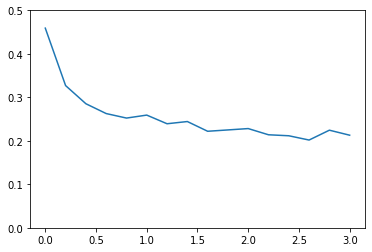

In [175]:
fig, ax = plt.subplots()
ax.plot(v_x, v_loss)
ax.set_ylim((0.0, 0.5))

In [226]:
mtrials.refresh()

In [200]:
sum(1 if x == 'new' else 0 for x in mtrials.statuses())

7

In [10]:
from IPython.display import display, clear_output
from time import sleep



In [197]:
mtrials.trials[0]['exp_key']

'covid-1'

In [502]:
mtrials.refresh()

In [271]:
mtrials.trials[t_idx]['misc']

['tid', 'cmd', 'workdir', 'idxs', 'vals']

In [517]:
def plot_param(pname):

    xs = []
    ys = []

    for t in mtrials.trials:
        if t['result'].get('loss') is None:
            continue
        params = hyperopt.space_eval(search_space, {k:v[0] for k,v in t['misc']['vals'].items()})
        xs.append(params[pname])
        ys.append(t['result']['loss'])

    fig, ax = plt.subplots()
    ax.scatter(xs, ys)
    ax.set_yscale('log')
    if pname == 'optim_initial_lr':
        ax.set_xscale('log')
        ax.set_xlim(1e-5.5, 1e-1.5)
    ax.set_title(pname)
    
    display(fig)
    plt.close(fig)

SyntaxError: invalid syntax (<ipython-input-517-d7c0e6c130d7>, line 18)

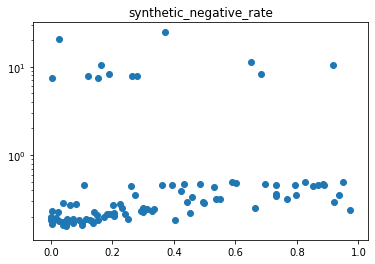

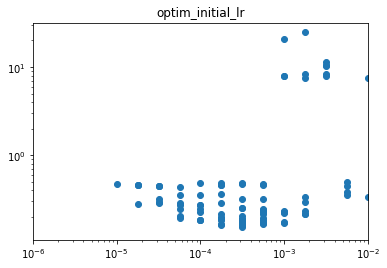

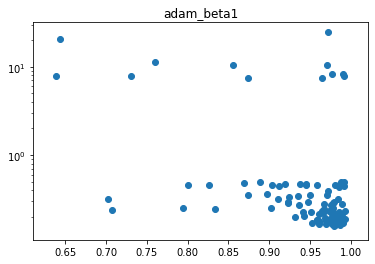

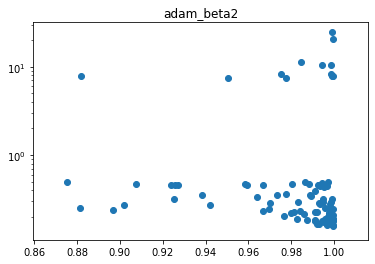

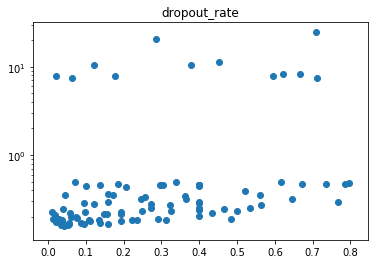

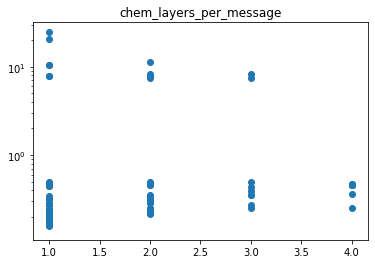

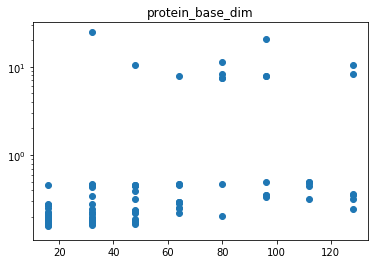

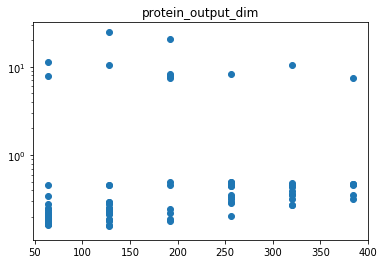

In [518]:
for param in ['synthetic_negative_rate', 'optim_initial_lr', 'adam_beta1', 'adam_beta2', 'dropout_rate', 'chem_layers_per_message', 'protein_base_dim', 'protein_output_dim']:
    plot_param(param)

In [519]:
mtrials.refresh()

In [ ]:
hyperopt.J

In [533]:
from collections import Counter, defaultdict

In [537]:
counters[]

defaultdict(<function __main__.<lambda>()>,
            {'covid-1': {0: Counter(),
              3: Counter(),
              1: Counter(),
              2: Counter()}})

In [553]:
from IPython.display import HTML

In [556]:
all_trials.refresh()

In [558]:
mtrials.refresh()

In [5]:
import pymongo

In [15]:
from pymongo import MongoClient
client = MongoClient('localhost', 1234)

In [7]:
jobs = client.covid['jobs']

In [8]:
len(list(jobs.find({'state':1})))

1

In [779]:
tr['refresh_time']

datetime.datetime(2020, 4, 21, 20, 33, 36, 323000)

In [9]:
for obj in list(jobs.find({'state':1})):
    jobs.find_one_and_delete({'_id':obj['_id']})

In [763]:
obj = jobs.find_one_and_delete({'exp_key':'covid-4'})
obj

In [651]:
hyperopt.STATUS_STRINGS

('new', 'running', 'suspended', 'ok', 'fail')

In [642]:
len(mtrials.trials)

111

In [620]:
for obj in client.covid['fs.files'].find():
    print(obj)

{'_id': ObjectId('5e9e153cb272fc0c15bccf8c'), 'filename': 'FMinIter_Domain', 'encoding': 'utf-8', 'exp_key': 'covid-1', 'md5': '5e9ab2058b952aad9047a1acfc1811e2', 'chunkSize': 261120, 'length': 27333, 'uploadDate': datetime.datetime(2020, 4, 20, 21, 33, 48, 594000)}
{'_id': ObjectId('5e9f193a2e1648053c867944'), 'filename': 'FMinIter_Domain', 'encoding': 'utf-8', 'exp_key': 'covid-3', 'md5': 'be44496efe7759b2d485827db2394c25', 'chunkSize': 261120, 'length': 27471, 'uploadDate': datetime.datetime(2020, 4, 21, 16, 3, 6, 141000)}


In [594]:
for obj in jobs.find({"state":1}):
    #jobs.find_one_and_update({'_id':obj['_id']},{'$set':{'owner':None}})
    print(obj['_id'], obj['owner'])

5e9e13712d11fd9570ff2822 None
5e9f002382d73e83fc7e5bc2 None
5e9f002382d73e83fc7e5bc3 None
5e9f002382d73e83fc7e5bc4 None
5e9f002482d73e83fc7e5bc8 None
5e9f002582d73e83fc7e5bcc None
5e9f004182d73e83fc7e5c2d None
5e9f0058012ebf63b16d299f None


In [588]:
help(jobs.find_and_update)

Help on Collection in module pymongo.collection object:

class Collection(pymongo.common.BaseObject)
 |  Collection(database, name, create=False, codec_options=None, read_preference=None, write_concern=None, read_concern=None, session=None, **kwargs)
 |  
 |  A Mongo collection.
 |  
 |  Method resolution order:
 |      Collection
 |      pymongo.common.BaseObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwargs)
 |      This is only here so that some API misusages are easier to debug.
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __getattr__(self, name)
 |      Get a sub-collection of this collection by name.
 |      
 |      Raises InvalidName if an invalid collection name is used.
 |      
 |      :Parameters:
 |        - `name`: the name of the collection to get
 |  
 |  __getitem__(self, name)
 |  
 |  __init__(self, database, name, create=False, codec_options=None, read_preference=None, write_concern=None, read_con

In [560]:
mtrials.trials[10]['owner']

['BRYCE-EAK-ACER7:36644']

In [557]:
state_lookup = {getattr(hyperopt, k):k for k in ['JOB_STATE_NEW', 'JOB_STATE_ERROR', 'JOB_STATE_RUNNING', 'JOB_STATE_DONE']}
state_lookup[-1] = 'JOB_STATE_Prev-Level Hints'
counters = defaultdict(lambda: Counter())

for tr in all_trials.trials:
    if 'training_loss_hist' in tr['result'] and tr['state'] == hyperopt.JOB_STATE_DONE:
        epoch = int(tr['result']['training_loss_hist'][-1][0])
        if tr['exp_key'] != f'covid-{epoch}':
            counters[tr['exp_key']][-1] += 1
        else:
            counters[tr['exp_key']][tr['state']] += 1
    else:
        counters[tr['exp_key']][tr['state']] += 1
    
HTML(f"""
<table class="table table-striped table-sm w-auto ml-1">
<thead class="thead-light">
<th>Hyperopt Pass</th><th>{'</th><th>'.join(state_lookup[i][10:].title() for i in range(-1,4))}</th>
</thead>
<tbody>
{''.join('<tr><th>' + k + '</th><td>' + '</td><td>'.join(
    str(counters[k][c]) for c in range(-1,4)
) + '</td></tr>' for k in counters.keys())}
</tbody>
""")

covid-1,10,0,1,87,0
covid-2,77,0,6,27,0
covid-3,74,1,0,36,0


In [547]:
state_lookup

{0: 'JOB_STATE_NEW',
 3: 'JOB_STATE_ERROR',
 1: 'JOB_STATE_RUNNING',
 2: 'JOB_STATE_DONE',
 -1: 'PASS_THROUGH_HINTS'}

In [531]:
tr.keys()

['_id',
 'state',
 'tid',
 'spec',
 'result',
 'misc',
 'exp_key',
 'owner',
 'version',
 'book_time',
 'refresh_time']

In [524]:
[tr['state'] for tr in mtrials.trials]

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1]

In [422]:
mtrials.delete_all()

In [414]:
trials = list(mtrials.trials)

In [423]:
mtrials.delete_all()

In [424]:
mtrials.refresh()

In [426]:
len(mtrials)

0

In [420]:
mtrials.insert_trial_docs(trials)

[ObjectId('5e9e5e5382d73e83fc7e5b04'),
 ObjectId('5e9e5e5382d73e83fc7e5b05'),
 ObjectId('5e9e5e5482d73e83fc7e5b06'),
 ObjectId('5e9e5e5482d73e83fc7e5b07'),
 ObjectId('5e9e5e5582d73e83fc7e5b08'),
 ObjectId('5e9e5e5582d73e83fc7e5b09'),
 ObjectId('5e9e5e5682d73e83fc7e5b0a'),
 ObjectId('5e9e5e5682d73e83fc7e5b0b'),
 ObjectId('5e9e5e5782d73e83fc7e5b0c'),
 ObjectId('5e9e5e5782d73e83fc7e5b0d'),
 ObjectId('5e9e5e5882d73e83fc7e5b0e'),
 ObjectId('5e9e5e5882d73e83fc7e5b0f'),
 ObjectId('5e9e5e5882d73e83fc7e5b10'),
 ObjectId('5e9e5e5982d73e83fc7e5b11'),
 ObjectId('5e9e5e5982d73e83fc7e5b12'),
 ObjectId('5e9e5e5982d73e83fc7e5b13'),
 ObjectId('5e9e5e5a82d73e83fc7e5b14'),
 ObjectId('5e9e5e5a82d73e83fc7e5b15'),
 ObjectId('5e9e5e5a82d73e83fc7e5b16'),
 ObjectId('5e9e5e5b82d73e83fc7e5b17'),
 ObjectId('5e9e5e5b82d73e83fc7e5b18'),
 ObjectId('5e9e5e5b82d73e83fc7e5b19'),
 ObjectId('5e9e5e5c82d73e83fc7e5b1a'),
 ObjectId('5e9e5e5c82d73e83fc7e5b1b'),
 ObjectId('5e9e5e5c82d73e83fc7e5b1c'),
 ObjectId('5e9e5e5c82d73e

In [417]:
for t in trials:
    del t['_id']
    tid = t['tid']
    t['misc']['idxs'] = {k:[tid] for k in t['misc']['idxs'].keys()}

In [418]:
t['misc']

SON([('tid', 3738), ('cmd', ['domain_attachment', 'FMinIter_Domain']), ('workdir', None), ('idxs', {'chem_hidden_size': [3738], 'chem_layers_per_message': [3738], 'chem_nonlinearity': [3738], 'dropout_rate': [3738], 'eps': [3738], 'inv_beta1': [3738], 'inv_beta2': [3738], 'lr_exp': [3738], 'neg_rate': [3738], 'protein_downscale_nonlinearity': [3738], 'protein_nonlinearity': [3738], 'protein_out_dim': [3738], 'protien_base_dim': [3738]}), ('vals', SON([('chem_hidden_size', [448.0]), ('chem_layers_per_message', [1.0]), ('chem_nonlinearity', [2]), ('dropout_rate', [0.7097555972104654]), ('eps', [0.00015811358302116524]), ('inv_beta1', [0.027406156115387627]), ('inv_beta2', [0.0007945309759339589]), ('lr_exp', [2.75]), ('neg_rate', [0.37168172156026946]), ('protein_downscale_nonlinearity', [4]), ('protein_nonlinearity', [1]), ('protein_out_dim', [128.0]), ('protien_base_dim', [32.0])]))])

In [413]:
mtrials.losses()

[7.439429350159346,
 0.1692000009115363,
 None,
 0.16114772885089448,
 0.165470789611178,
 0.17653787017966338,
 0.22130780178566012,
 0.16525157686275244,
 0.2172142272598822,
 0.18634207285815674,
 None,
 0.16664173639201835,
 0.1957035639003981,
 0.17309890359522506,
 0.22373886773720947,
 0.23310064350091755,
 0.2402137711800636,
 0.21203745794913786,
 0.2274126981031661,
 0.21915882515082888,
 0.19002372246121751,
 0.22345033561588287,
 0.2056929076334187,
 0.28525064332917555,
 0.21655175371417645,
 0.2802831254829167,
 0.3126174179777176,
 0.25632707441524355,
 0.2043305233835873,
 0.23226056074481238,
 0.23385558467193485,
 0.25837453606217403,
 0.20344991294791878,
 0.33895270858506893,
 0.21328111628602275,
 0.22479035340367565,
 0.3556961630207984,
 0.22169327307610345,
 0.22389276772592984,
 0.23422493468952832,
 0.2890324062397457,
 0.2520814773839728,
 0.2715198570780236,
 0.2690689443427018,
 0.2258686390389643,
 0.44775285827415306,
 0.2434224739944544,
 0.3164257690536

0.20344991294791878


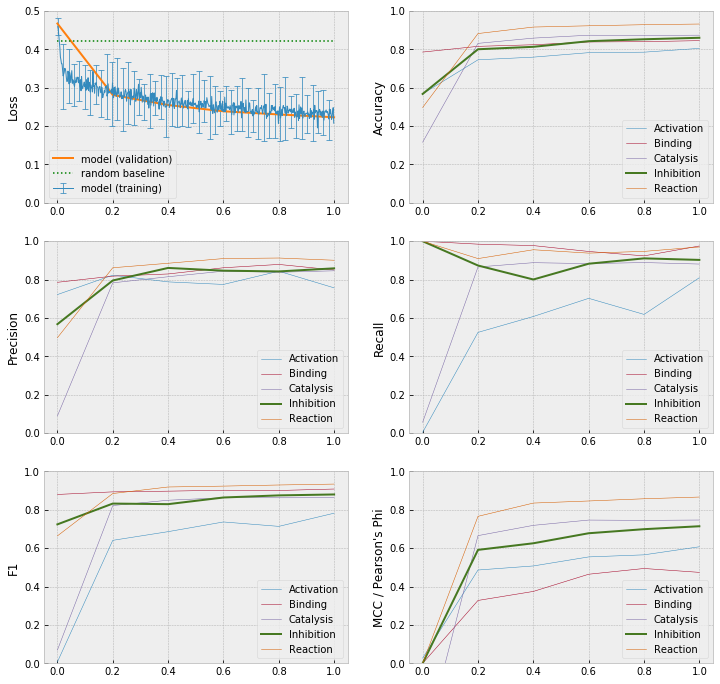

KeyboardInterrupt: 

In [410]:
idx_list = np.argsort([x if x is not None else np.inf for x in mtrials.losses()]).flatten()
last = False

for i, t_idx in enumerate(idx_list):
    t = mtrials.trials[t_idx]
    if t is None or t.get('result') is None or t['result'].get('training_loss_hist') is None:
        t = mtrials.best_trial
        last = True
        
    losses = t['result']['training_loss_hist']
    validation_stats = t['result']['validation_stats']

    fig = get_performance_plots(losses, validation_stats);
    clear_output()
    print(t['result']['loss'])
    display(fig)
    plt.close(fig);
    
    if last:
        break
    sleep(5 if i < 5 else 1)

In [10]:
from covid.training import _set_random_seeds
from covid.datasets import create_data_split, StitchDataset

In [13]:
data = StitchDataset('./data/valid_00')

In [14]:
data._deferred_load()
(data.all_data.iloc[:,2:]>0).mean(0)

activation    0.340611
binding       0.732567
catalysis     0.199311
inhibition    0.581246
reaction      0.175132
dtype: float64

In [4]:
len(data)

69307

In [2]:
import logging
import sys
logging.basicConfig(level=logging.DEBUG)

In [4]:
_set_random_seeds(4)
create_data_split('./data', './data/retry_train', './data/retry_holdout')

DEBUG:root:Random seeds set: 4
DEBUG:root:Creating 0.875 data split - ./data/retry_train ; ./data/retry_holdout


DEBUG:root:Test set selected -- 10.308% (dropping 7.146%, truncated 27.208%)


In [10]:
new_train_data = StitchDataset('./data/retry_train')

In [11]:
new_train_data._deferred_load()

In [12]:
(new_train_data.all_data.iloc[:,2:]>0).mean(0)

activation    0.198218
binding       0.697067
catalysis     0.139705
inhibition    0.593850
reaction      0.131626
dtype: float64

In [13]:
len(new_train_data.all_chemicals), len(new_train_data.all_proteins)

(4996, 36396)

In [14]:
new_test_data = StitchDataset('./data/retry_holdout')
new_test_data._deferred_load()
(new_test_data.all_data.iloc[:,2:]>0).mean(0)

activation    0.565565
binding       0.450005
catalysis     0.359125
inhibition    0.159994
reaction      0.495763
dtype: float64

In [15]:
len(new_test_data.all_chemicals), len(new_test_data.all_proteins)

(478, 8298)

In [331]:
import requests

In [333]:
with open('./logfile.txt', 'rb') as f:
    requests.put('http://127.0.0.1:8000/training-state/logfile', data=f)

In [334]:
r = requests.get('https://google.com')

In [275]:
import logging

In [322]:
d = mtrials.best_trial['refresh_time']

In [325]:
d.strftime("%S")

'29'

In [317]:
mtrials.best_trial.keys()

['_id',
 'state',
 'tid',
 'spec',
 'result',
 'misc',
 'exp_key',
 'owner',
 'version',
 'book_time',
 'refresh_time']

In [313]:
len(mtrials.trials)

82

In [277]:
log = logging.getLogger()

In [128]:
from hyperopt import hp
import hyperopt
search_space = {
        'synthetic_negative_rate': hp.uniform('neg_rate', 0,1),
        'optim_initial_lr': 10 ** -hp.quniform('lr_exp', 2, 5, 0.25),
        'adam_beta1': 1-hp.loguniform('inv_beta1', -5, -1),
        'adam_beta2': 1-hp.loguniform('inv_beta2', -8, -2),
        'optim_adam_eps': hp.loguniform('eps', -15, 0),
        'dropout_rate': hp.uniform('dropout_rate', 0.01, 0.8),
        'chem_layers_per_message': hp.quniform('chem_layers_per_message', 1,4,1),
        'chem_hidden_size': hp.quniform('chem_hidden_size', 64,384,64),
        'chem_nonlinearity': hp.choice(
            'chem_nonlinearity',
            ['ReLU', 'LeakyReLU', 'tanh', 'ELU']),
        'protein_base_dim': hp.quniform('protien_base_dim', 16,80,16),
        'protein_output_dim': hp.quniform('protein_out_dim', 64, 384, 64),
        'protein_nonlinearity': hp.choice(
            'protein_nonlinearity', 
            ['relu', 'silu', 'tanh', 'leaky_relu', 'elu']),
        'protein_downscale_nonlinearity': hp.choice(
            'protein_downscale_nonlinearity', 
            ['relu', 'silu', 'tanh', 'leaky_relu', 'elu']),
    }

In [129]:
mtrials.best_trial['misc']['vals']

SON([('chem_hidden_size', [384.0]), ('chem_layers_per_message', [1.0]), ('chem_nonlinearity', [3]), ('eps', [1.973891530032813e-06]), ('inv_beta1', [0.05730964741577067]), ('inv_beta2', [0.02348907039091992]), ('lr_exp', [3.5]), ('neg_rate', [0.20401408708284396]), ('protein_downscale_nonlinearity', [4]), ('protein_nonlinearity', [0]), ('protein_out_dim', [256.0]), ('protien_base_dim', [80.0]), ('dropout_rate', [0.4])])

In [301]:
hyperopt.space_eval(search_space, {k:v[0] for k,v in mtrials.trials[idx_list[2]]['misc']['vals'].items() if len(v) > 0})

{'adam_beta1': 0.9610379605240368,
 'adam_beta2': 0.9909243250920076,
 'chem_hidden_size': 448.0,
 'chem_layers_per_message': 1.0,
 'chem_nonlinearity': 'ELU',
 'dropout_rate': 0.03688811278332571,
 'optim_adam_eps': 4.249902669467103e-05,
 'optim_initial_lr': 0.00031622776601683794,
 'protein_base_dim': 32.0,
 'protein_downscale_nonlinearity': 'tanh',
 'protein_nonlinearity': 'relu',
 'protein_output_dim': 64.0,
 'synthetic_negative_rate': 0.13382273239526193}

In [105]:
dict(mtrials.best_trial['misc']['vals'])

{'chem_hidden_size': [384.0],
 'chem_layers_per_message': [1.0],
 'chem_nonlinearity': [3],
 'eps': [1.973891530032813e-06],
 'inv_beta1': [0.05730964741577067],
 'inv_beta2': [0.02348907039091992],
 'lr_exp': [3.5],
 'neg_rate': [0.20401408708284396],
 'protein_downscale_nonlinearity': [4],
 'protein_nonlinearity': [0],
 'protein_out_dim': [256.0],
 'protien_base_dim': [80.0]}

In [5]:
config = covid.training.CovidTrainingConfiguration()
dl, vdl = covid.training._create_dataloaders(config)

In [6]:
len(dl)

8545

In [7]:
it = iter(dl)

In [10]:
for _ in range (8500):
    next(it)

In [4]:
np.random.seed(4);
random.seed(4);
T.manual_seed(4);

# 4 -- chosen by fair die roll.  Guaranteed to be random.  https://xkcd.com/221/

In [5]:
DROPOUT_RATE = 0.4
BATCH_SIZE = 16

VALIDATION_FREQUENCY = 0.2

In [6]:
DEVICE = 'cuda'

In [7]:
chem_model = MPNEncoder(
    layers_per_message=2, 
    hidden_size=300,
    dropout=DROPOUT_RATE
)

protein_model = create_protein_model(dropout=DROPOUT_RATE)

model = CovidModel(chem_model, protein_model, dropout=DROPOUT_RATE)

In [8]:
params = list(model.parameters())

In [17]:
for param in params:
    if len(param.shape) >= 2:
        T.nn.init.kaiming_normal_(param)
    else:
        T.nn.init.normal_(param)

In [8]:
model.to(DEVICE);

In [9]:
if not os.path.exists('./data/training'):
    create_data_split('./data', './data/training', './data/final_holdout')
    
    for i in range(10):
        create_data_split('./data/training', f'./data/train_{i:02}', f'./data/valid_{i:02}')

In [10]:
# Have to reset the seeds again to account for the possibility we did or didn't just create the datasets

np.random.seed(4);
random.seed(4);
T.manual_seed(4);

In [11]:
data = covid.datasets.StitchDataset('./data/train_00')
dataloader = create_dataloader(data, BATCH_SIZE)

In [12]:
validation_data = covid.datasets.StitchDataset('./data/valid_00', neg_rate=0.0)
validation_dataloader = create_dataloader(validation_data, BATCH_SIZE)

In [13]:
optim = T.optim.Adam(model.parameters(), lr=1e-4, betas=(0.95, 0.99))
warmup = LinearWarmupScheduler(optim, 2000)

In [14]:
losses = []
validation_stats = []

In [11]:
from covid.training import _create_model, CovidTrainingConfiguration, _create_dataloaders

In [17]:
from hyperopt import hp

In [18]:
SEARCH_SPACE = {
    'synthetic_negative_rate': hp.uniform('neg_rate', 0,1),
    'optim_initial_lr': 10 ** -hp.quniform('lr_exp', 2, 5, 0.25),
    'adam_beta1': 1-hp.loguniform('inv_beta1', -5, -1),
    'adam_beta2': 1-hp.loguniform('inv_beta2', -8, -2),
    'optim_adam_eps': hp.loguniform('eps', -15, 0),
    'dropout_rate': hp.uniform('dropout_rate', 0.01, 0.8),
    'chem_layers_per_message': hp.quniform('chem_layers_per_message', 1,4,1),
    'chem_hidden_size': hp.quniform('chem_hidden_size', 64,512,64),
    'chem_nonlinearity': hp.choice(
        'chem_nonlinearity',
        ['ReLU', 'LeakyReLU', 'tanh', 'ELU']),
    'protein_base_dim': hp.quniform('protien_base_dim', 16,128,16),
    'protein_output_dim': hp.quniform('protein_out_dim', 64, 384, 64),
    'protein_nonlinearity': hp.choice(
        'protein_nonlinearity', 
        ['relu', 'silu', 'tanh', 'leaky_relu', 'elu']),
    'protein_downscale_nonlinearity': hp.choice(
        'protein_downscale_nonlinearity', 
        ['relu', 'silu', 'tanh', 'leaky_relu', 'elu']),
}

In [64]:
model_key = 'hyperopt_f405f71cb2bd'
model_tid = 10956796

In [65]:
run = jobs.find_one({'tid':model_tid})

In [66]:
params = hyperopt.space_eval(SEARCH_SPACE, {k:v[0] for k,v in run['misc'].get('vals',{}).items()})

In [67]:
config = CovidTrainingConfiguration()
for key, val in params.items():
        if not hasattr(config, key):
            print(f"No parameter {key} -- skipping")
            continue

        if isinstance(getattr(config, key), int):
            setattr(config, key, int(val))
        else:
            setattr(config, key, val)

No parameter adam_beta1 -- skipping
No parameter adam_beta2 -- skipping


In [68]:
import requests

In [69]:
r = requests.get(f'http://localhost:5535/training-state/{model_key}', stream=True)
with gzip.open(r.raw, 'rb') as f:
#with gzip.open("../../Downloads/hyperopt_0b99c3062211__state.pkl.gz", "rb") as f:
    state = T.load(f, map_location=config.device)

In [70]:
class AvgWrapper(nn.Module):
    def __init__(self, module, decay = 0.95):
        super().__init__()
        self._avg = None
        self._module = module
        self._decay = decay
        
    def forward(self, *args, **kwargs):
        val = self._module(*args, **kwargs)
        
        if self._avg is None:
            self._avg = val.detach().mean(0, keepdim=True)
            
        self._avg = self._avg * self._decay + (1-self._decay) * val.detach().mean(0, keepdim=True)
        
        return self._avg.clone().repeat((val.shape[0],) + tuple(1 for _ in val.shape[1:]))
    
class ZeroWrapper(nn.Module):
    def __init__(self, module):
        super().__init__()
        self._module = module
        
    def forward(self, *args, **kwargs):
        val = self._module(*args, **kwargs)
        
        return val * 0.0

In [80]:
from sklearn.model_selection import train_test_split

In [71]:
train_dl, val_dl = _create_dataloaders(config, 1.0)

In [88]:
train_dl.dataset.datasets[0].all_data.head()

,item_id_a,item_id_b,activation,binding,catalysis,inhibition,reaction
0,CIDm00000015,10116.ENSRNOP00000009129,211.666667,999.0,0.0,795.000000,0.0
1,CIDm00000015,10141.ENSCPOP00000009446,0.000000,997.0,0.0,353.333333,0.0
2,CIDm00000015,13616.ENSMODP00000016441,322.000000,997.0,0.0,354.333333,0.0
3,CIDm00000015,28377.ENSACAP00000012374,0.000000,997.0,0.0,353.333333,0.0
4,CIDm00000015,51511.ENSCSAVP00000011584,292.000000,999.0,0.0,396.666667,0.0


(array([3215.,  115.,  122.,  150.,  205.,  143.,  186.,  308.,  827.,
        1055.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <a list of 10 Patch objects>)

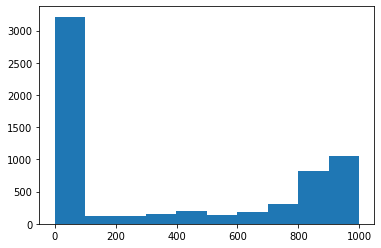

In [94]:
plt.hist(train_dl.dataset.datasets[0].all_data.groupby('item_id_a')['inhibition'].mean().sort_values())

In [72]:
good_model = _create_model(config)
no_chem_model = _create_model(config)
no_prot_model = _create_model(config)

MODELS = good_model, no_chem_model, no_prot_model

In [73]:
MODEL_NAMES = ['Real', 'Chem Component Averaged', 'Protein Component Averaged']

In [74]:
for model in MODELS:
    model.load_state_dict(state['model'])
    model = model.to(device=config.device)

In [75]:
no_chem_model.chem_model = AvgWrapper(no_chem_model.chem_model)
no_prot_model.protein_model = AvgWrapper(no_prot_model.protein_model)

In [76]:
from covid.reporting import calculate_average_loss_and_accuracy, get_performance_stats

In [77]:
stats = [
    calculate_average_loss_and_accuracy(model, val_dl, config.device)
    for model in MODELS
]

In [78]:
from sklearn.metrics import roc_curve

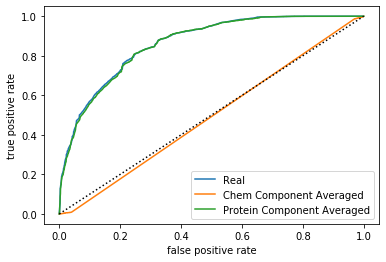

In [79]:
for model_stats, name in zip(stats, MODEL_NAMES):
    fpr, tpr, thresholds = roc_curve(model_stats[-1]['Inhibition'].values.astype(int), model_stats[-1]['pred_Inhibition'].values, pos_label=1)
    plt.plot(fpr, tpr, label=name)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    
plt.plot((0,1), (0,1), ls=':', c='k')
plt.legend()

In [390]:
stats[-1]

,chem,protein,Activation,Binding,Catalysis,Inhibition,Reaction,pred_Activation,pred_Binding,pred_Catalysis,pred_Inhibition,pred_Reaction
0,CIDs05480230,6239.C16D6.2,0.0,1.0,0.0,1.0,0.0,2.275075e-04,9.969389e-01,0.000060,9.924179e-01,5.988303e-08
1,CIDm00000985,69293.ENSGACP00000021040,1.0,0.0,0.0,0.0,0.0,9.985124e-01,2.116413e-03,0.001571,7.492861e-04,5.397182e-03
2,CIDs05460048,8364.ENSXETP00000008146,0.0,1.0,0.0,0.0,1.0,8.454274e-01,9.970009e-01,0.003710,3.980134e-04,9.988585e-01
3,CIDm00003931,9361.ENSDNOP00000007730,1.0,0.0,0.0,0.0,0.0,9.998679e-01,2.577218e-08,0.000003,1.558913e-05,1.820825e-06
4,CIDs06438398,10116.ENSRNOP00000018622,0.0,0.0,0.0,0.0,1.0,2.615208e-02,2.999941e-02,0.000039,3.625387e-06,9.495355e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
19051,CIDs00015993,7260.FBpp0254127,0.0,0.0,0.0,1.0,0.0,5.934486e-07,8.271730e-06,0.002346,2.115073e-01,2.298784e-03
19052,CIDs00044259,59689.Al_scaffold_0006_1558,0.0,1.0,0.0,1.0,0.0,8.609900e-04,9.791169e-01,0.000003,8.660253e-01,1.118274e-07
19053,CIDm00010180,5306.JGI97404,0.0,0.0,0.0,1.0,0.0,1.139385e-04,1.728230e-03,0.000246,8.977114e-02,6.485521e-07
19054,CIDm00003067,7237.FBpp0284691,0.0,1.0,0.0,0.0,0.0,2.811785e-03,9.973508e-01,0.000013,1.977533e-05,1.976135e-11


In [341]:
get_performance_stats([stats])

ValueError: too many values to unpack (expected 4)

In [240]:
state['optim']['param_groups'][0]['lr']

0.000316724631701071

In [22]:
a, b, c, d = zip(*state['validation_stats'])

In [242]:
from collections import defaultdict

In [245]:
defaultdict(lambda: 8, {2:3, 3:5})[6]

8

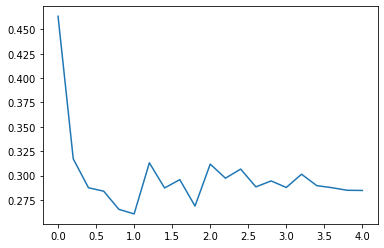

In [24]:
plt.plot(a,b)

In [74]:
from collections import namedtuple

In [75]:
namedtuple('')

<function collections.namedtuple(typename, field_names, *, rename=False, defaults=None, module=None)>

In [78]:
from collections import namedtuple
ConfusionMatrix = namedtuple('ConfusionMatrix', ['tp', 'fp', 'fn', 'tn'])

In [293]:
state.keys()

dict_keys(['epoch', 'losses', 'validation_stats', 'last_validation', 'model', 'optim', 'warmup', 'scheduler'])

In [ ]:
model = 

In [17]:
from functools import partial

get_validation_loss = partial(
    calculate_average_loss_and_accuracy, 
    model, 
    validation_dataloader,
    DEVICE
)

In [18]:
epoch = 0
last_validation = epoch

if os.path.exists("training_state_00.pkl"):
    state = T.load("./training_state_00.pkl", map_location=DEVICE)
        
    epoch = state.get('epoch', epoch)
    losses = state.get('losses', losses)
    validation_stats = state.get('validation_stats', validation_stats)
    last_validation = state.get('last_validation', last_validation)
    model.load_state_dict(state['model'])
    optim.load_state_dict(state['optim'])
    warmup.load_state_dict(state['warmup'])
    
    
if epoch == 0:
    vloss, vacc, v_conf = get_validation_loss()
    validation_stats.append([0, vloss, vacc, v_conf])

In [19]:
if not os.path.exists("./checkpoints/"):
    os.mkdir("./checkpoints")

In [20]:
chart_area = widgets.Output()
display(chart_area)

for epoch in tqdm(range(epoch, 100)):
    idx = 0
    
    model.train()
    pct_epoch = 0
    
    for batch in tqdm(dataloader, leave=False):

        model.zero_grad()
        _, _, loss, _ = run_model(model, batch, DEVICE)

        loss.backward()

        optim.step()
        warmup.step()
            
        idx += BATCH_SIZE
        pct_epoch = min(1.0, idx/len(data))
        
        losses.append((epoch + pct_epoch, loss.item()))
        
        if pct_epoch == 1.0 or epoch + pct_epoch - last_validation > VALIDATION_FREQUENCY:
            vloss, vacc, v_conf = get_validation_loss()
            validation_stats.append([epoch+pct_epoch, vloss, vacc, v_conf])
            
            chart_area.clear_output()
            fig = get_performance_plots(losses, validation_stats)
            with chart_area:
                display(fig)
            plt.close(fig)
            
            last_validation = epoch + pct_epoch
            
    state = {
        'epoch': epoch,
        'losses': losses,
        'validation_stats': validation_stats,
        'last_validation': last_validation,
        'model': model.state_dict(),
        'optim': optim.state_dict(),
        'warmup': warmup.state_dict(),
    }
    T.save(state, f'./checkpoints/model_00_{epoch:03}.pkl')
    T.save(state, "./training_state_00.pkl")

Output()

KeyboardInterrupt: 

In [ ]:
plot_losses(losses, validation_stats, max(10, len(losses)//2000))